In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy import sparse

Create a meshgrid of $x$ and $y$ coordinates

In [2]:
N = 400
X, Y = np.mgrid[0:1:N*1j,0:1:N*1j]

Eigenstates of the Schrodinger equation satisfy $H\psi = E\psi$ where $H$ is the Hamiltonian operator, and $E$ and $\psi$ represent the eigenvalues/eigenstates. The Hamiltonian Operator in 2D is

$$H = -\frac{1}{2m}\left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) + V(x,y)$$

If we discretize $\psi$ into a vector (spacing $\Delta x$), the equation $H\psi = E\psi$ can be arranged and rewritten in 2 dimensions as

$$\left[-\frac{1}{2}(D \oplus D) + m\Delta x^2 V \right] \psi = \left(m \Delta x^2 E\right) \psi$$

where

* $\psi$ is a vector of length $N^2$ where $N$ is the number of discretized points in $x$ and $y$
* $D$ is an $N \times N$ matrix
* $D \oplus D$ is a tridiagonal $N^2 \times N^2$ matrix with -2 on the main diagonal and 1 on the two neighbouring diagonals. $\oplus$ represents the Kronecker sum of two matrices.
* $V$ is a diagonal $N^2 \times N^2$ matrix with each entry on the diagonal representative of the potential at that particular coordinate.

 Firstly, we define our potential in units of $m \Delta x^2$; in other words `get_potential` actually returns $m\Delta x^2 V$

In [3]:
def get_potential(x, y):
    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential(X,Y)

Now we construct

$$- \frac{1}{2} D \oplus D + m\Delta x^2 V $$
\
Let $T=- \frac{1}{2} D \oplus D$ and $U = m\Delta x^2 V$

In [4]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [5]:
H

<160000x160000 sparse matrix of type '<class 'numpy.float64'>'
	with 798400 stored elements in Compressed Sparse Row format>

Get eigenvectors and eigenvalues

In [6]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

In [7]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

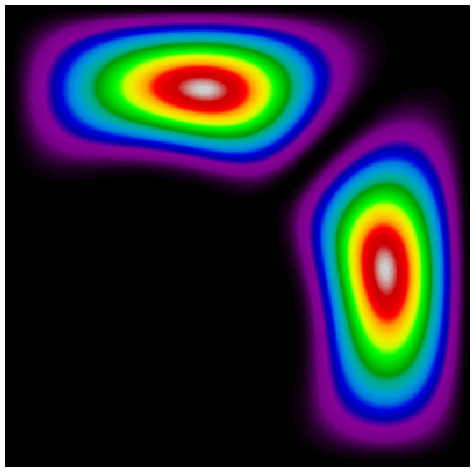

In [9]:
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, get_e(1)**2, cmap='nipy_spectral')
plt.axis('off')
plt.show()

Animation code

In [ ]:
my_cmap = plt.get_cmap('cool')
def init():
    # Plot the surface.
    ax.plot_surface(X, Y, get_e(3)**2, cmap=my_cmap,
                       linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=4*i)
    return fig,

fig = plt.figure()
ax = Axes3D(fig)
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif',writer='pillow',fps=20)

**For infinite square well only**: Note that $E_{n_x, n_y} = \alpha ( n_x^2 + n_y^2 ) $. First energy at $n_x=1$ and $n_y=1$. This means we can find $\alpha = \text{half the lowest eigenvalue}$ and we can plot $E/\alpha$ which should be distributed like $n_x^2 + n_y^2$ for different combinations of $n_x$ and $n_y$.

In [ ]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0, len(eigenvalues), 1)
plt.scatter(_, E_div_alpha)
#[plt.axhline(nx**2 + ny**2,color='r') for nx in range(1,5) for ny in range(1,5)]